In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
x_train[0].max()

255

In [7]:
x_train = x_train / 255


In [8]:
x_test = x_test / 255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_train[0]

array([6], dtype=uint8)

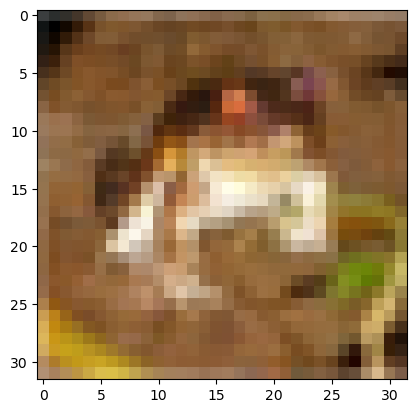

In [15]:
plt.imshow(x_train[0])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
model = Sequential()

#convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation = 'relu'))

#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.fit(x_train,y_cat_train,epochs = 20,
         validation_data= (x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4909 - accuracy: 0.4625 - val_loss: 1.2656 - val_accuracy: 0.5395
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1737 - accuracy: 0.5842 - val_loss: 1.1178 - val_accuracy: 0.6054
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0186 - accuracy: 0.6446 - val_loss: 1.0085 - val_accuracy: 0.6524
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9001 - accuracy: 0.6862 - val_loss: 0.9714 - val_accuracy: 0.6675
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8054 - accuracy: 0.7191 - val_loss: 0.9421 - val_accuracy: 0.6762
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7232 - accuracy: 0.7488 - val_loss: 0.9403 - val_accuracy: 0.6863
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6474 - accuracy: 0.7761 - val_loss: 0.9743 - val_accuracy:

In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

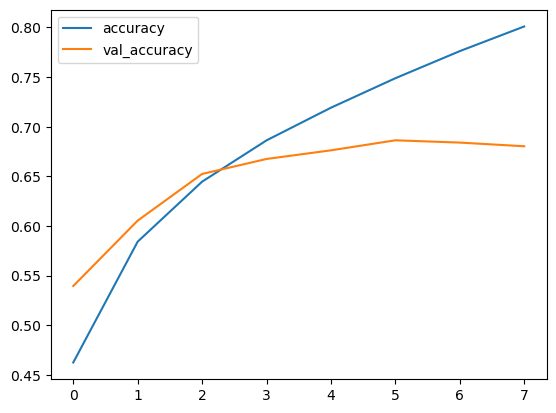

In [28]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

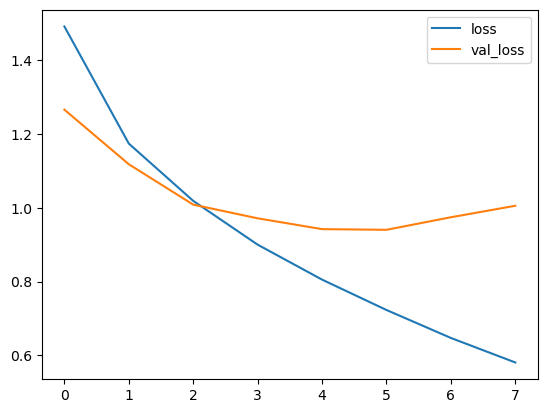

In [29]:
metrics[['loss','val_loss']].plot()

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0053566694259644, 0.6802999973297119]

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test),axis=1)


313/313 [==============================] - 1s 2ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.84      0.76      0.79      1000
           2       0.59      0.56      0.58      1000
           3       0.53      0.48      0.50      1000
           4       0.59      0.69      0.64      1000
           5       0.68      0.41      0.51      1000
           6       0.80      0.75      0.77      1000
           7       0.62      0.80      0.70      1000
           8       0.72      0.83      0.77      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



<Axes: >

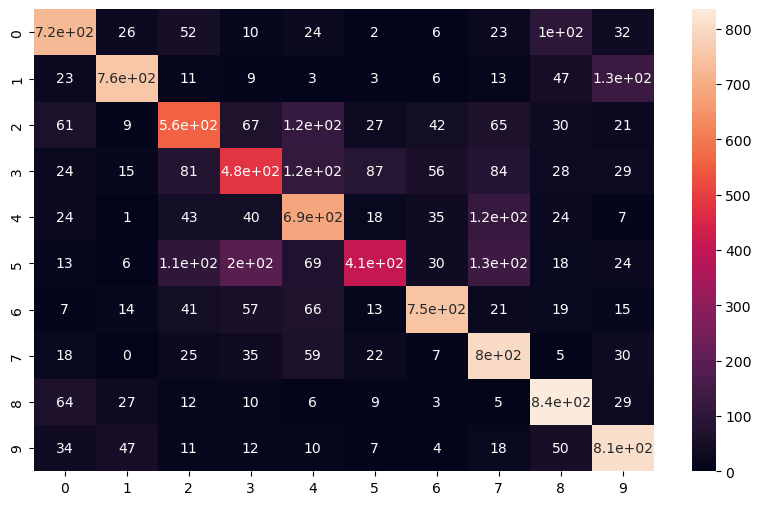

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [39]:
single_image = x_test[0]

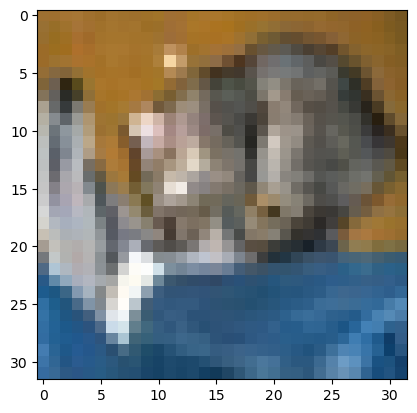

In [40]:
plt.imshow(single_image)

In [41]:
y_test[0]

array([3], dtype=uint8)